In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [5]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df=df[["survived","age","pclass","sex","fare","embarked"]]
df.head()

,survived,age,pclass,sex,fare,embarked
0,0,22.0,3,male,7.2500,S
1,1,38.0,1,female,71.2833,C
2,1,26.0,3,female,7.9250,S
3,1,35.0,1,female,53.1000,S
4,0,35.0,3,male,8.0500,S


In [8]:
df.isna().sum()

survived      0
age         177
pclass        0
sex           0
fare          0
embarked      2
dtype: int64

In [9]:
df["age"].fillna(df["age"].mean(),inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0],inplace=True)
df.isna().sum()

C:\Users\dobil\AppData\Local\Temp\ipykernel_1672\589858672.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].mean(),inplace=True)
C:\Users\dobil\AppData\Local\Temp\ipykernel_1672\589858672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"].fillna(df["age"].mean(),inplace=True)
C:\Users\dobil\AppData\Loca

survived    0
age         0
pclass      0
sex         0
fare        0
embarked    0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
df["sex"]=en.fit_transform(df["sex"])
df["embarked"]=en.fit_transform(df["embarked"])

C:\Users\dobil\AppData\Local\Temp\ipykernel_1672\2590438246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sex"]=en.fit_transform(df["sex"])
C:\Users\dobil\AppData\Local\Temp\ipykernel_1672\2590438246.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["embarked"]=en.fit_transform(df["embarked"])


In [11]:
df.head()

,survived,age,pclass,sex,fare,embarked
0,0,22.0,3,1,7.2500,2
1,1,38.0,1,0,71.2833,0
2,1,26.0,3,0,7.9250,2
3,1,35.0,1,0,53.1000,2
4,0,35.0,3,1,8.0500,2


In [14]:
x=df.drop("survived",axis=1)
y=df["survived"]
print(x.head())
y.head()


    age  pclass  sex     fare  embarked
0  22.0       3    1   7.2500         2
1  38.0       1    0  71.2833         0
2  26.0       3    0   7.9250         2
3  35.0       1    0  53.1000         2
4  35.0       3    1   8.0500         2


0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

Confusion Matrix:
 [[92 13]
 [23 51]]
Accuracy:
 0.7988826815642458


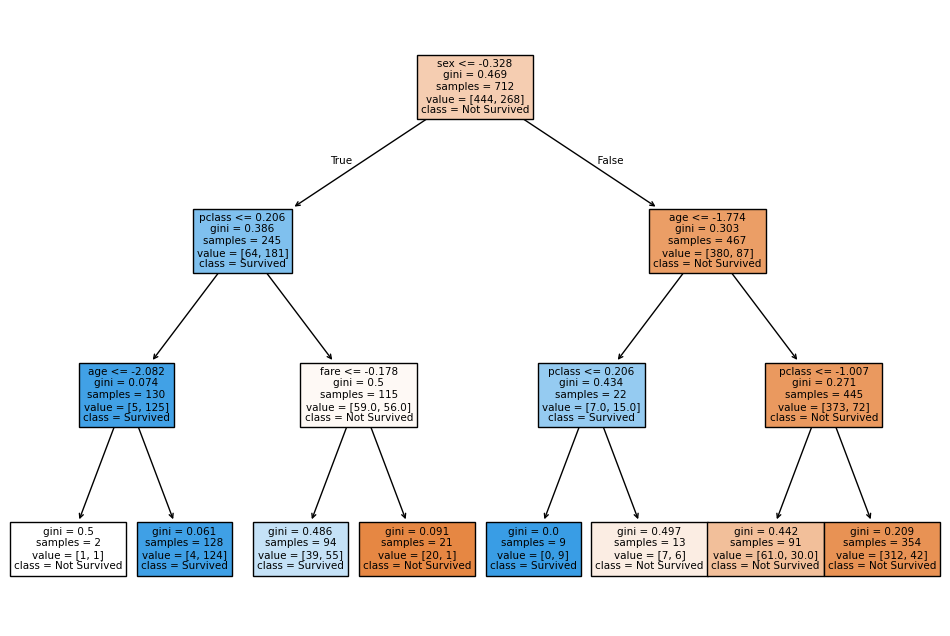

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.transform(x_test)
dtc=DecisionTreeClassifier(criterion='gini',max_depth=3)
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy:\n",accuracy_score(y_test,y_pred))
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dtc,filled=True,feature_names=x.columns,class_names=["Not Survived","Survived"])
plt.show()

In [22]:
new_passenger=pd.DataFrame([[3,1,25,7,2]],columns=x.columns)
new_passenger_scaled=s.transform(new_passenger)
p=dtc.predict(new_passenger_scaled)
p

array([1])

In [23]:
if p[0]==1:
    print("The passenger is predicted to Survive.")
else:
    print("The passenger is predicted to Not Survive.")

The passenger is predicted to Survive.
